In [53]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('../dataset/Stores Sales.csv')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4,249.8092,1999,0.0,2.0,1.0,3735.1380
1,5.92,1.0,0.019278,14,48.2692,2009,2.0,0.0,2.0,443.4228
2,17.50,0.0,0.016760,10,141.6180,1999,1.0,2.0,1.0,2097.2700
3,19.20,1.0,0.000000,6,182.0950,1998,0.0,0.0,0.0,732.3800
4,8.93,0.0,0.000000,9,53.8614,1987,1.0,0.0,1.0,994.7052


In [55]:
## Independent And dependent features
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales'] 

In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [57]:
X_train.shape,X_test.shape

((9649, 9), (3217, 9))

In [58]:
X_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.024393,-0.009910,0.036334,0.019220,-0.009535,-0.037018,-0.004629,-0.006395
Item_Fat_Content,-0.024393,1.000000,0.054308,-0.134924,0.006466,-0.009365,-0.031606,0.000876,0.005207
Item_Visibility,-0.009910,0.054308,1.000000,-0.041110,0.003369,-0.058996,-0.006104,0.014274,-0.130839
Item_Type,0.036334,-0.134924,-0.041110,1.000000,0.041252,0.006639,-0.170276,0.004926,-0.000812
Item_MRP,0.019220,0.006466,0.003369,0.041252,1.000000,0.016051,-0.047687,0.013249,-0.020919
Outlet_Establishment_Year,-0.009535,-0.009365,-0.058996,0.006639,0.016051,1.000000,-0.166360,0.053931,0.063528
Outlet_Size,-0.037018,-0.031606,-0.006104,-0.170276,-0.047687,-0.166360,1.000000,-0.213961,0.035500
Outlet_Location_Type,-0.004629,0.000876,0.014274,0.004926,0.013249,0.053931,-0.213961,1.000000,-0.447691
Outlet_Type,-0.006395,0.005207,-0.130839,-0.000812,-0.020919,0.063528,0.035500,-0.447691,1.000000


<Axes: >

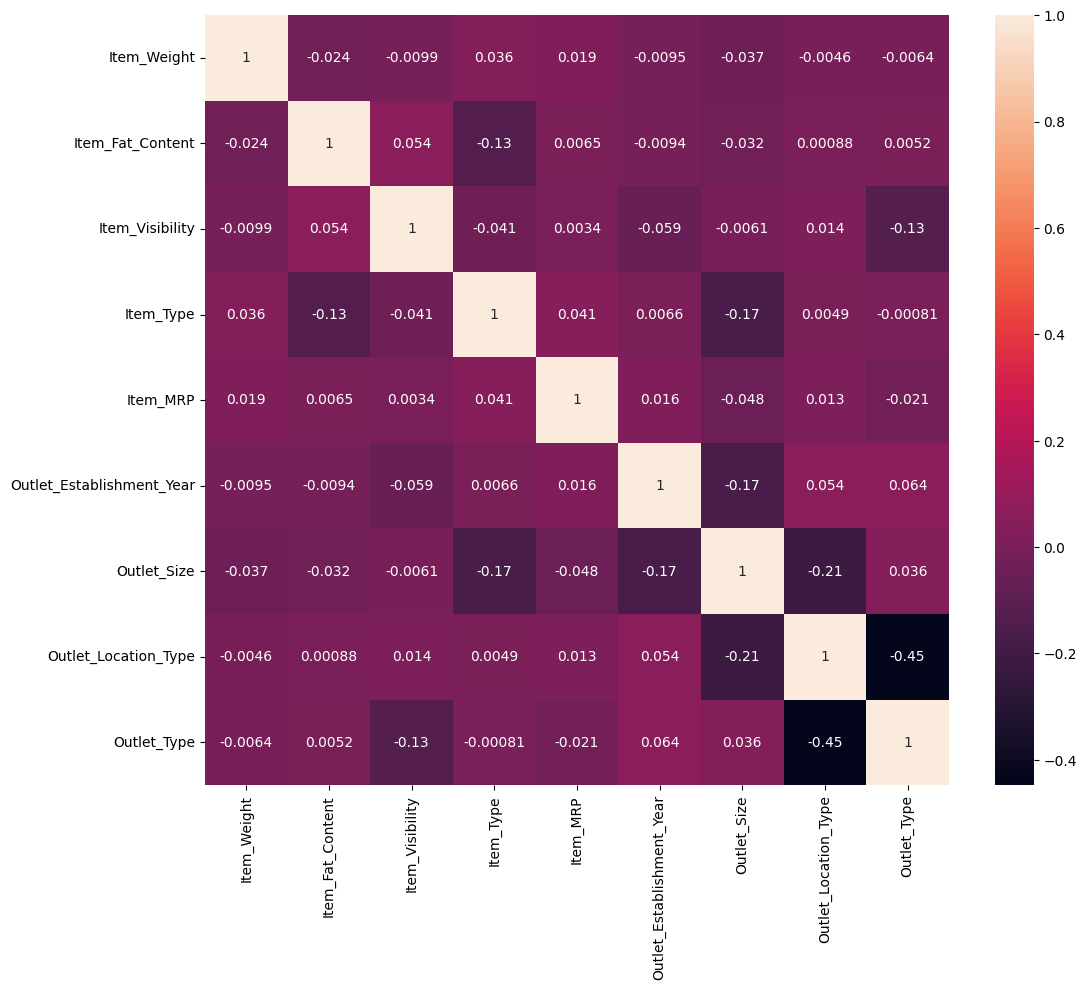

In [59]:
## Check for multicollinearity
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [60]:
## Feature Scaling Or Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[-0.01268491,  1.341057  ,  1.73652749, ...,  0.30116394,
        -1.10475821,  2.71880231],
       [-0.28698363, -0.74568046, -0.90733784, ...,  0.30116394,
         1.26593276, -0.27762527],
       [-1.75768398, -0.74568046, -0.68233505, ..., -0.97392638,
         0.08058728, -0.27762527],
       ...,
       [-0.70718373,  1.341057  , -0.78891569, ...,  0.30116394,
        -1.10475821, -1.77583906],
       [-1.48398608, -0.74568046, -0.65197784, ..., -0.97392638,
        -1.10475821,  1.22058852],
       [-1.88033698, -0.74568046,  1.56589119, ..., -0.97392638,
         0.08058728, -0.27762527]])

In [61]:
## Decision tree  Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

regressor=DecisionTreeRegressor()
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

regressorcv.fit(X_train_scaled,y_train)

y_pred=regressorcv.predict(X_test_scaled)



In [62]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [63]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 718.140064587043
R2 Score 0.5399735375840894


In [64]:
import pickle
pickle.dump(scaler,open('../models/scaler.pkl','wb'))
pickle.dump(regressorcv,open('../models/DTR.pkl','wb'))

In [65]:
# from  sklearn.ensemble import RandomForestRegressor

# regressor=RandomForestRegressor()
# ## Hyperparameter Tunning
# parameter={
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


# from sklearn.model_selection import GridSearchCV
# regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

# regressorcv.fit(X_train_scaled,y_train)

# y_pred=regressorcv.predict(X_test_scaled)

# print(mean_absolute_error(y_pred,y_test))
# score=r2_score(y_test,y_pred)
# print("R2 Score", score)